Part A — training images: 300
Part A — testing images : 182


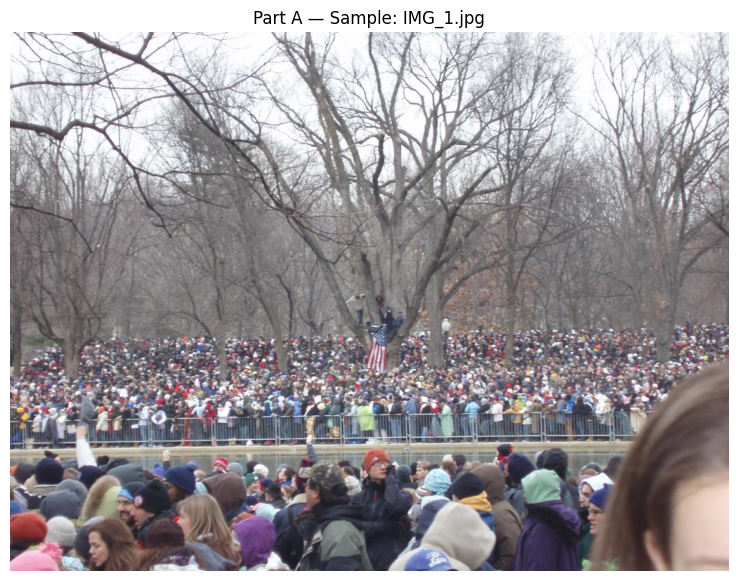

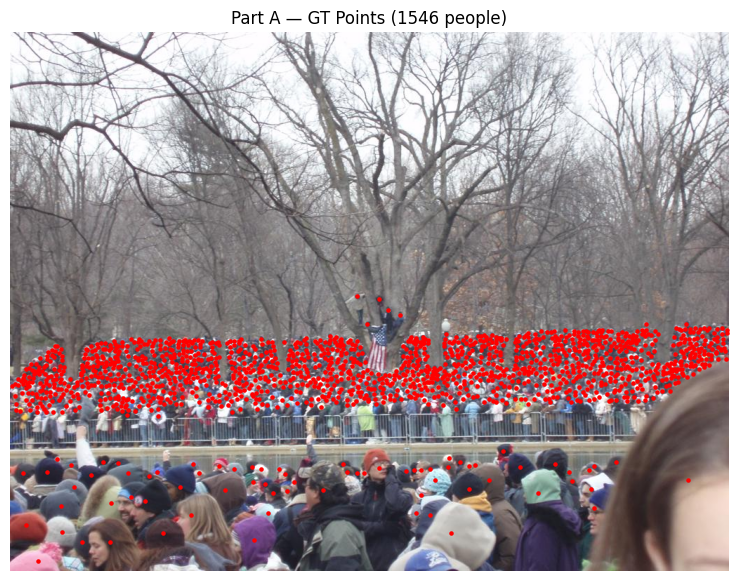

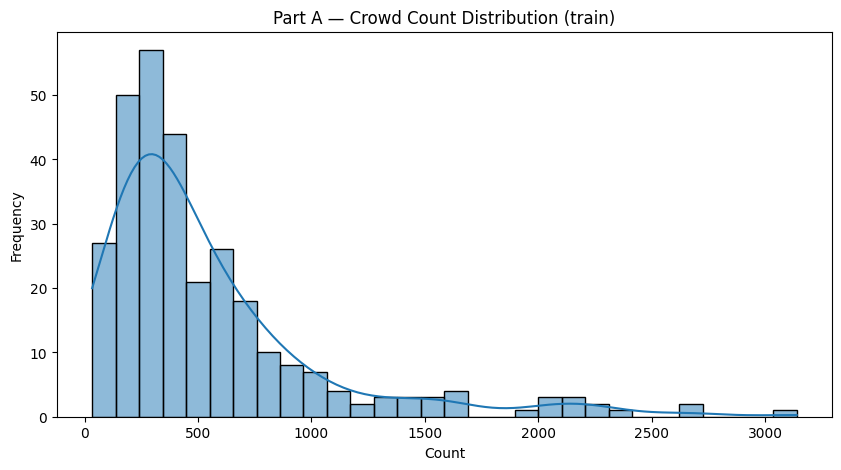

min: 33 max: 3139 mean: 542.36


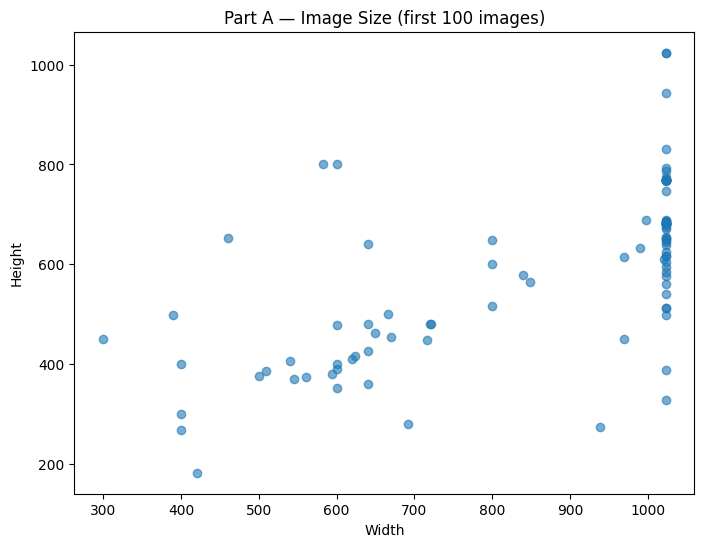

avg width: 865 avg height: 594


,count
count,300.000000
mean,542.356667
std,505.286451
min,33.000000
25%,238.750000
50%,378.000000
75%,653.500000
max,3139.000000


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import scipy.io as sio
import pandas as pd
##Paths & file lists
train_img_path_A = r"C:\Users\anany\OneDrive\Desktop\Deepvision-Crowd-Monitor\ShanghaiTech_Crowd_Counting_Dataset\part_A_final\train_data\images"
train_gt_path_A  = r"C:\Users\anany\OneDrive\Desktop\Deepvision-Crowd-Monitor\ShanghaiTech_Crowd_Counting_Dataset\part_A_final\train_data\ground_truth"

test_img_path_A  = r"C:\Users\anany\OneDrive\Desktop\Deepvision-Crowd-Monitor\ShanghaiTech_Crowd_Counting_Dataset\part_A_final\test_data\images"
test_gt_path_A   = r"C:\Users\anany\OneDrive\Desktop\Deepvision-Crowd-Monitor\ShanghaiTech_Crowd_Counting_Dataset\part_A_final\test_data\ground-truth"

train_images_A = sorted([f for f in os.listdir(train_img_path_A) if f.lower().endswith('.jpg') or f.lower().endswith('.png')])
test_images_A  = sorted([f for f in os.listdir(test_img_path_A) if f.lower().endswith('.jpg') or f.lower().endswith('.png')])

print("Part A — training images:", len(train_images_A))
print("Part A — testing images :", len(test_images_A))
##Show sample image

sample = train_images_A[0]
img = plt.imread(os.path.join(train_img_path_A, sample))
plt.figure(figsize=(10,7))
plt.imshow(img)
plt.title(f"Part A — Sample: {sample}")
plt.axis('off')

##Show GT points for sample
gt_mat = sio.loadmat(os.path.join(train_gt_path_A, "GT_" + sample.replace(".jpg","") + ".mat"))
points = gt_mat["image_info"][0][0][0][0][0]
plt.figure(figsize=(10,7))
plt.imshow(img)
plt.scatter(points[:,0], points[:,1], s=5, c='red')
plt.title(f"Part A — GT Points ({len(points)} people)")
plt.axis('off')

##Crowd count distribution

counts_A = []
for name in train_images_A:
    mat = sio.loadmat(os.path.join(train_gt_path_A, "GT_" + name.replace(".jpg","") + ".mat"))
    pts = mat["image_info"][0][0][0][0][0]
    counts_A.append(len(pts))

plt.figure(figsize=(10,5))
sns.histplot(counts_A, kde=True, bins=30)
plt.title("Part A — Crowd Count Distribution (train)")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

print("min:", np.min(counts_A), "max:", np.max(counts_A), "mean:", np.mean(counts_A).round(2))

##Image size distribution
widths, heights = [], []
for name in train_images_A[:100]:
    w,h = Image.open(os.path.join(train_img_path_A,name)).size
    widths.append(w); heights.append(h)

plt.figure(figsize=(8,6))
plt.scatter(widths, heights, alpha=0.6)
plt.xlabel("Width"); plt.ylabel("Height")
plt.title("Part A — Image Size (first 100 images)")
plt.show()
print("avg width:", int(np.mean(widths)), "avg height:", int(np.mean(heights)))

## Summary table code
dfA = pd.DataFrame({"image": train_images_A, "count": counts_A})
dfA.describe()




